# Clustering des documents – K-Means

## Objectif
Appliquer l’algorithme K-Means sur les vecteurs TF-IDF afin
d’identifier des groupes de documents similaires sans supervision.


# Cellule 2 — Import des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Cellule 3 — Chargement des données nettoyées

In [2]:
df = pd.read_csv("data/bbc-text-cleaned.csv")
texts = df["clean_text"]

# Cellule 4 — Vectorisation TF-IDF (mêmes paramètres qu’étape 3)

In [3]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
    ngram_range=(1, 2),
    stop_words="english"
)

X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Cellule 5 — Choix du nombre de clusters (Elbow Method)

In [4]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_tfidf)
    inertia.append(km.inertia_)

# Cellule 6 — Visualisation de l’Elbow

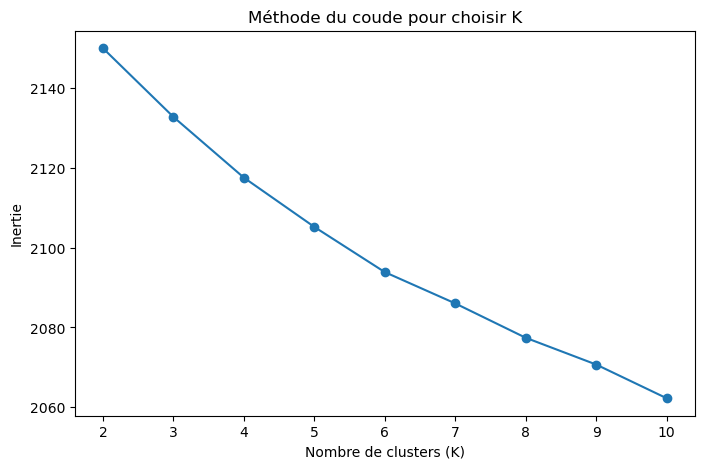

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour choisir K")
plt.show()

# Cellule 7 — Entraînement du modèle K-Means final

In [6]:
k = 5  # choix justifié par l'Elbow Method

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_tfidf)

# Cellule 8 — Ajout des clusters au DataFrame

In [7]:
df["cluster"] = clusters
df.head()

,clean_text,category,cluster
0,future hand viewer home theatre system plasma ...,tech,4
1,worldcom bos left book alone former worldcom b...,business,1
2,tiger wary farrell gamble leicester say rushed...,sport,3
3,yeading face newcastle cup premiership side ne...,sport,3
4,ocean twelve raid box office ocean twelve crim...,entertainment,0


# Cellule 9 — Répartition des documents par cluster

In [8]:
df["cluster"].value_counts()

cluster
1    571
3    545
4    532
2    370
0    207
Name: count, dtype: int64

In [ ]:
# Sauvegarde du modèle et des documents pour l'application
import joblib, os
os.makedirs('data', exist_ok=True)
# Construction d'une liste de documents (titre, contenu, thème)
documents = []
for i, row in df.iterrows():
    titre = row.get('title') or row.get('titre') or f'Document {i+1}'
    contenu = row.get('clean_text') or row.get('text') or row.get('contenu') or row.iloc[0]
    theme = row.get('category') or row.get('theme') or ''
    documents.append({'titre': titre, 'contenu': contenu, 'theme': theme})
joblib.dump(kmeans, 'data/model.pkl')
joblib.dump(documents, 'data/documents.pkl')
# Sauvegarde optionnelle de la matrice TF-IDF si présente
try:
    joblib.dump(X_tfidf, 'data/tfidf_matrix.pkl')
except NameError:
    pass
print('Saved model.pkl and documents.pkl to data/')

# Cellule 10 — Comparaison cluster / thème (INTERPRÉTATION)

In [9]:
pd.crosstab(df["cluster"], df["category"])

category,business,entertainment,politics,sport,tech
cluster,,,,,
0,0,204,0,0,3
1,491,25,42,1,12
2,5,0,364,0,1
3,1,13,5,510,16
4,13,144,6,0,369


## Conclusion du clustering K-Means

- Le modèle K-Means a permis de regrouper les documents par similarité.
- Le nombre de clusters a été choisi de manière justifiée.
- Les labels réels ont été utilisés uniquement pour l’interprétation.
